# Russian Troll Tweets

In [93]:
# Basics
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
import datetime
import pickle 

# visualizations
from wordcloud import WordCloud
from nltk import FreqDist

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import spacy

from preprocessing_funcs import clean_tweet, get_hashtags

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    tweets = pickle.load(read_file)

In [3]:
tweets.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


In [4]:
tweets.tail()

,text,processed
203477,"RT @AndreaChalupa: In intel circles, the story...",intel circle story go fsb film trump orgy russ...
203478,RT @KansasCityDNews: Tonganoxie police: Middle...,tonganoxie police middle school girl sexually ...
203479,RT @signsinyork: Getting the right #company lo...,get right company logo business get message ac...
203480,The Latest: Obama affirms continuity of ties w...,late obama affirm continuity tie canada
203481,RT @futureguru100: U cant just Upload a CD onl...,u can not upload cd online product work u get ...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       203482 non-null  object
 1   processed  203482 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


## Word Vectorization

### Count Vectorizer

In [6]:
cv = CountVectorizer()
doc_word = cv.fit_transform(tweets['processed'])
vect = pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())
vect

,10,100,1000,12,13,14,16,19,20,aa,...,zynalturist,zynischen,zyoritv,zzcrane,zzion,zzjwmc,zzzs,zzzzzz,zzzzzzz,zzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TFIDF Vectorizer

In [7]:
tfidf = TfidfVectorizer()
doc_word = tfidf.fit_transform(tweets['processed'])
tfidf_matrix = pd.DataFrame(doc_word.toarray(),columns=cv.get_feature_names())
tfidf_matrix

,10,100,1000,12,13,14,16,19,20,aa,...,zynalturist,zynischen,zyoritv,zzcrane,zzion,zzjwmc,zzzs,zzzzzz,zzzzzzz,zzzzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modeling

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [11]:
proc_tweets = tweets.processed

### LSA

In [39]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1, 3))

svd_model = TruncatedSVD(n_components=10, 
                        algorithm='randomized',
                        n_iter=50,
                        random_state=42)

# pipeline of tf-idf + SVD, fit and applied to docs: 

svd_transformer = Pipeline([('tfidf', vectorizer),
                           ('svd', svd_model)])

svd_matrix = svd_transformer.fit_transform(proc_tweets)

In [40]:
terms = vectorizer.get_feature_names()

for ix, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(ix)+": ")
    for t in sorted_terms:
        print(t[0])
    print("")

Topic 0: 
trump
donald
donald trump
real
real donald
real donald trump
hillary
clinton
president
hillary clinton

Topic 1: 
hillary
clinton
hillary clinton
debate
never
one
obama
thing
say
get

Topic 2: 
target
account target
account target iceisis
iceisis
iceisis opiceisis
isis account target
target iceisis
target iceisis opiceisis
target isis account
opiceisis

Topic 3: 
make
one
phrase
one phrase
america
great
hate
make hate
hate one
hate one phrase

Topic 4: 
president
trump
trump president
america
great
america great
make america
make america great
obama
say

Topic 5: 
america
great
make america
america great
make america great
make
real
hillary
real donald
real donald trump

Topic 6: 
merkel
muss
merkel muss
die
ist
sie
merkel merkel
merkel merkel muss
girlstalkselfies
frau

Topic 7: 
debate
topic
reject debate
debate topic
reject debate topic
reject
well
well alternative
alternative debate
well alternative debate

Topic 8: 
black
live
matt
live matt
black live
black live matt
lo

In [52]:
vectorizer = CountVectorizer(max_features=20000,
                             binary=True)

svd_model = TruncatedSVD(n_components=10, 
                        algorithm='randomized',
                        n_iter=50,
                        random_state=42)

# pipeline of tf-idf + SVD, fit and applied to docs: 

svd_transformer = Pipeline([('cv', vectorizer),
                           ('svd', svd_model)])

svd_matrix = svd_transformer.fit_transform(proc_tweets)

In [53]:
terms = vectorizer.get_feature_names()

for ix, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(ix)+": ")
    for t in sorted_terms:
        print(t[0])
    print("")

Topic 0: 
trump
donald
hillary
clinton
real
say
president
obama
politic
make

Topic 1: 
hillary
clinton
obama
email
never
campaign
bill
fbi
say
get

Topic 2: 
obama
get
make
people
say
america
go
one
like
us

Topic 3: 
get
donald
make
real
hillary
one
people
america
go
like

Topic 4: 
donald
obama
real
hillary
america
tcot
make
pjnet
great
president

Topic 5: 
make
america
great
one
tcot
clinton
phrase
wake
hate
pjnet

Topic 6: 
clinton
donald
real
make
get
politic
obama
america
news
new

Topic 7: 
say
people
donald
real
like
black
know
thing
live
kill

Topic 8: 
people
like
go
black
live
one
know
clinton
think
white

Topic 9: 
people
america
tcot
pjnet
ccot
wake
black
get
party
maga



### Corex

[lecture example notebook](https://github.com/scrapfishies/onl20_ds4/blob/master/curriculum/project-04/fancy-nlp/corex/CorEx.ipynb)

In [54]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [94]:
vectorizer = CountVectorizer(max_features=20000,
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)

doc_word = vectorizer.fit_transform(proc_tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [95]:
# n_hidden is the number of topics
# words is your list of words used in your corpus
# I recommend adding docs=df.data to make it easier to check which sentences are in each resulting topic

topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=proc_tweets)

In [96]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: trump, hillary, clinton, donald, real, campaign, politic, poll, email, supporter
1: pjnet, tcot, ccot, merkel, muss, islam, mt, tea, die, ist
2: obama, america, midnight, gop, black, us, american, democrat, matt, country
3: news, police, white, fox, muslim, attack, post, state, report, house
4: via, new, guide, thanksgiving, survival, youtube, headline, york, oscarhasnocolor, favorite
5: click, san, soundcloud, shoot, billion, global, promotion, pipeline, car, usfa


In [97]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=0, n_docs=5)

[('absolutely undeniable hillary campaign start birther conspiracy hillary clintonoriginalbirther',
  0.0),
 ('soldier really think hillary clinton trumpafact trumpwon nationalvoterregistrationday',
  0.0),
 ('real donald trump hillary clinton remember crucial totally unfit commander chief',
  0.0),
 ('watch msnbc say hillary clinton start birther movement', 0.0),
 ('learn lyric tequila replace c js every cif bottle within mile radiu', 0.0)]

In [98]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(6)])
predictions.head()

,topic0,topic1,topic2,topic3,topic4,topic5
0,False,True,False,True,False,False
1,True,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,True,False,True,True,False,False


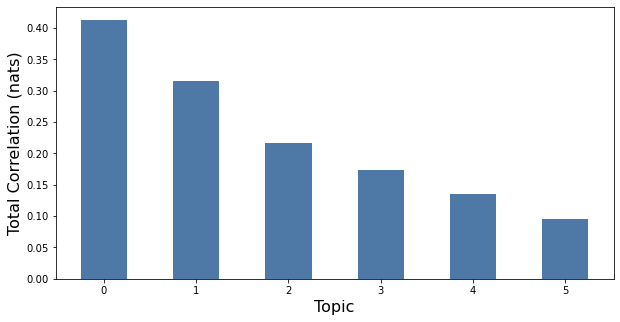

In [99]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [104]:
topic_model = ct.Corex(n_hidden=7, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
                anchors=[['trump', 'donald', 'maga', 'rep', 'republican', 'gop'], 
                         ['hillary', 'clinton', 'email', 'democrat', 'dnc'], 
                         ['black', 'live', 'police'], 
                         ['obama', 'barack'],
                         ['isis', 'islam', 'muslim'], 
                         ['politic', 'debate']], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: trump,donald,gop,maga,real,republican,president,supporter,rally,trumptrain
1: hillary,clinton,email,democrat,dnc,crook,campaign,fbi,foundation,wikileaks
2: black,live,police,matt,officer,white,cop,oscarhasnocolor,shoot,man
3: obama,tcot,pjnet,ccot,mt,cruz,ted,barack,america,crow
4: islam,isis,muslim,refugee,kill,terrorist,muslims,islamic,brussels,attack
5: politic,debate,tea,topic,reject,party,alternative,poll,pence,mike
6: merkel,muss,ist,die,gift,politician,idea,nowplaying,das,sie


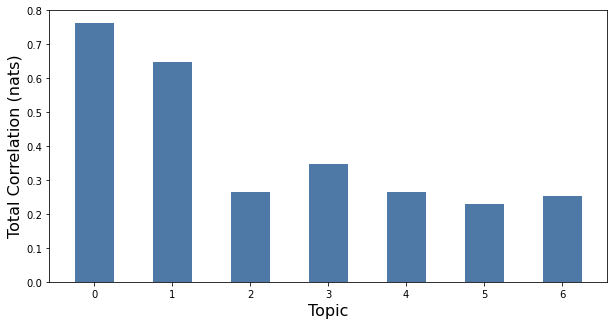

In [105]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()